<a href="https://colab.research.google.com/github/sahilpokhriyal/cv/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
data = pd.read_csv('train.csv')
data1 = pd.read_csv('test.csv')

(891, 12)


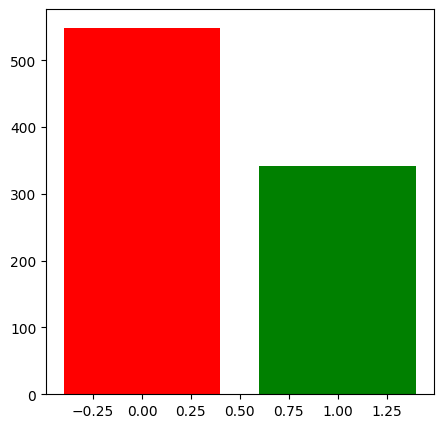

In [41]:
print(data.shape)

data.Survived.value_counts()
plt.figure(figsize=(5, 5))
plt.bar(list(data.Survived.value_counts().keys()), list(data.Survived.value_counts()), color=['r', 'g'])
plt.show()



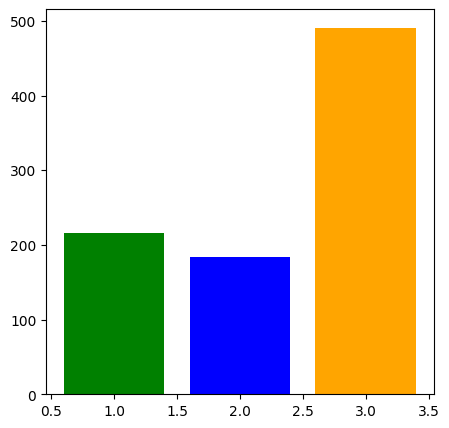

In [42]:
data.Pclass.value_counts()
plt.figure(figsize=(5, 5))
plt.bar(list(data.Pclass.value_counts().keys()), list(data.Pclass.value_counts()), color=['Orange', 'Green', 'Blue'])
plt.show()


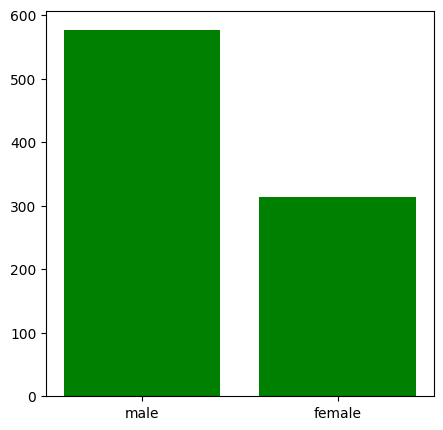

In [43]:
data.Sex.value_counts()
plt.figure(figsize=(5, 5))
plt.bar(list(data.Sex.value_counts().keys()), list(data.Sex.value_counts()), color='Green')
plt.show()


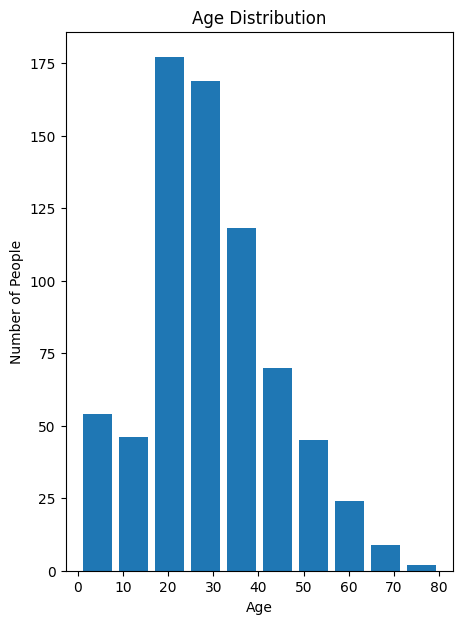

In [44]:
plt.figure(figsize=(5, 7))
plt.hist(data.Age, rwidth=0.8)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of People")
plt.show()


In [45]:
sum(data.Survived.isnull())
sum(data.Age.isnull())
data.Age.fillna(data.Age.mean(), inplace=True)
sum(data.Age.isnull())
x_train = data.Age
y_train = data.Survived


In [50]:
print(data.shape)
print(data.head(5))

(891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S  


In [51]:
income_set = set(data['Sex'])
data['Sex'] = data['Sex'].map({'female': 0, 'male': 1})
print(data.head)

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex        Age  SibSp  \
0                              Braund, Mr. Owen Harris  NaN  22.000000      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  NaN  38.000000      1   
2                               Heikkinen, Miss. Laina  NaN  26.000000      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  NaN  35.000000      1   
4                             Allen, Mr. William Henry  NaN  35.000000      0   
..                         

In [52]:
X = data.drop('Survived',axis='columns')
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",NaN,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",NaN,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",NaN,35.000000,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",NaN,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",NaN,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",NaN,19.000000,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",NaN,26.000000,0,0,111369,30.0000,C148,C


In [53]:
Y = data.Survived
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [54]:
X.columns[X.isna().any()]
X.Age = X.Age.fillna(X.Age.mean())
X.columns[X.isna().any()]
X.Age

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [55]:
# Function to calculate the mean of a list of values
def mean(values):
    return sum(values) / len(values)

# Function to calculate the standard deviation of a list of values
def std_dev(values):
    mean_val = mean(values)
    variance = sum((x - mean_val) ** 2 for x in values) / len(values)
    return math.sqrt(variance)

# Function to calculate the probability density function of a value
def calculate_pdf(x, mean_val, std_dev_val):
    exponent = math.exp(-((x - mean_val) ** 2) / (2 * std_dev_val ** 2))
    return (1 / (math.sqrt(2 * math.pi) * std_dev_val)) * exponent

# Class for Gaussian Naive Bayes classifier
class NaiveBayes:
    def __init__(self):
        self.class_probabilities = {}
        self.class_means = {}
        self.class_std_devs = {}

    def fit(self, X, y):
        # Calculate the class probabilities
        total_samples = len(X)
        for class_label in set(y):
            class_samples = [X[i] for i in range(total_samples) if y[i] == class_label]
            self.class_probabilities[class_label] = len(class_samples) / total_samples
            self.class_means[class_label] = [mean(feature_values) for feature_values in zip(*class_samples)]
            self.class_std_devs[class_label] = [std_dev(feature_values) for feature_values in zip(*class_samples)]

    def predict(self, X):
        predictions = []
        for sample in X:
            class_scores = {}
            for class_label, class_probability in self.class_probabilities.items():
                class_mean = self.class_means[class_label]
                class_std_dev = self.class_std_devs[class_label]
                likelihood = 1
                for i in range(len(sample)):
                    feature_value = sample[i]
                    pdf = calculate_pdf(feature_value, class_mean[i], class_std_dev[i])
                    likelihood *= pdf
                class_scores[class_label] = class_probability * likelihood
            predicted_class = max(class_scores, key=class_scores.get)
            predictions.append(predicted_class)
        return predictions


In [56]:
x_test = data1.Age
x_test

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413     NaN
414    39.0
415    38.5
416     NaN
417     NaN
Name: Age, Length: 418, dtype: float64

In [58]:
def fit(self, X, y):
    # Calculate the class probabilities
    total_samples = len(X)
    for class_label in set(y):
        class_samples = [list(X[i]) for i in range(total_samples) if y[i] == class_label]
        self.class_probabilities[class_label] = len(class_samples) / total_samples
        self.class_means[class_label] = [mean(feature_values) for feature_values in zip(*class_samples)]
        self.class_std_devs[class_label] = [std_dev(feature_values) for feature_values in zip(*class_samples)]
